In [45]:
import seaborn as sns

I. DISTRIBUIÇÃO NORMAL

- Muito utilizada para modelar fenômenos físicos (altura, peso) e sociais (salários, produção de uma fábrica );
- Melhor ajustada a grandes quantidades de dados.

/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


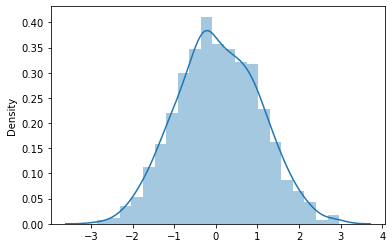

In [46]:
from scipy.stats import skewnorm
dados_normal = skewnorm.rvs(a = 0, size = 1000)
sns.distplot(dados_normal);

Exercício 1: 

Uma empresa fez um concurso para seleção de novos funcionários. A prova tinha 50 questões e Pedro acertou 40 questões. Considerando uma distribuição normal com média 24 e desvio padrão de 8, quais são as chances dele ser contratado?

In [24]:
x = 40
media = 24
desvio_padrao = 8

In [25]:
# Manual
z_escore = (x - media) / desvio_padrao
z_escore

2.0

In [26]:
# olhando na Tabela Z: https://datascience.eu/pt/matematica-e-estatistica/tabela-z/
0.97725

0.97725

In [27]:
# Automático (scipy)
from scipy.stats import norm

norm.cdf(x, media, desvio_padrao)

0.9772498680518208

Exercício 2:

A vida útil de uma marca de pneus é representada por uma distribuição normal com média de 38.000 Km e desvio padrão de 3.000 Km.

In [28]:
media = 38000
desvio_padrao = 3000

1. Qual a probabilidade de que um pneu escolhido aleatoriamente tenha vida útil de 35.000 Km?

In [29]:
1 - norm.cdf(35000, media, desvio_padrao)

0.8413447460685429

In [30]:
# Ou (sem o -1)
norm.sf(35000, media, desvio_padrao)

0.8413447460685429

2. Qual a probabilidade de que ele dure mais do que 44.000 Km?

In [31]:
norm.sf(44000, media, desvio_padrao)

0.022750131948179195

II. DISTRIBUIÇÃO BINOMIAL

- Somente duas possibilidades (sucesso ou falha)
- Eventos devem ser independentes uns dos outros.

/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


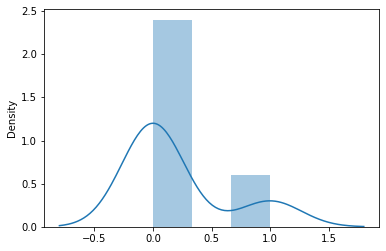

In [52]:
from scipy.stats import binom
dados_binomial = binom.rvs(size = 10, n = 3, p = 0.05)
sns.distplot(dados_binomial, kde=True);

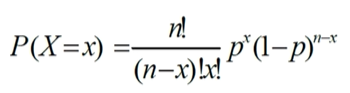

In [34]:
# Fórmula probabilidade binomial
from IPython.display import Image
Image('formula_prob_binomial.png')

Exemplo:

Qual a probabilidade de obter 5 caras, jogando uma moeda 10 vezes?

In [39]:
n = 10 # tentativas / trials / espaço amostral
x = 5 # sucessos
p = 0.5 # probabilidade de sucessos

In [40]:
# Manual
import math

(math.factorial(n)) / (math.factorial(x) * math.factorial(n - x)) * math.pow(p, x) * math.pow(1 - p, n - x)

0.24609375

In [41]:
# Automático (scipy)
from scipy.stats import binom

binom.pmf(x, n, p)

0.24609375000000003

Exercício 1

70% das pessoas que compraram o livro de Python são mulheres. Se 10 leitores forem selecionados randomicamente, qual a probabilidade de selecionarmos 7 mulheres?

In [42]:
n = 10 # tentativas / trials / espaço amostral
x = 7 # sucessos
p = 0.7 # probabilidade de sucessos

binom.pmf(x, n, p)

0.26682793200000005

Exercício 2

Em uma linha de produção de uma fábrica de parafusos, a probabilidade de obter um parafuso defeituoso é 0,05. Tendo uma amostra de 50 peças, qual a probabilidade de obter:

1. Um parafuso defeituoso

In [43]:
n = 50 # tentativas / trials / espaço amostral
x = 1 # sucessos
p = 0.05 # probabilidade de sucessos

binom.pmf(x, n, p)

0.2024867770439825

2. Nenhum parafuso defeituoso

In [44]:
n = 50 # tentativas / trials / espaço amostral
x = 0 # sucessos
p = 0.05 # probabilidade de sucessos

binom.pmf(x, n, p)

0.07694497527671315

III. DISTRIBUIÇÃO DE POISSON

- Número de vezes que um evento aconteceu em um intervalo de tempo;
- Não considera o número de experimentos;
- Eventos devem ser independentes;
- Considera o número de sucessos baseados no tempo.

/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


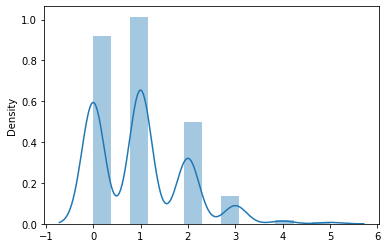

In [49]:
from scipy.stats import poisson
dados_poisson = poisson.rvs(size = 1000, mu = 1)
sns.distplot(dados_poisson, kde=True);

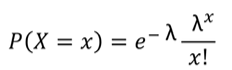

In [53]:
# Fórmula Poisson
from IPython.display import Image
Image('formula_poisson.png')

Exemplo:

O número de Carros vendidos por dia é 10. Qual a ptobabilidade de vender 14 carros amanhã?

In [55]:
x = 14
media = 10

In [56]:
# Manual
import math

math.pow(math.e, -media) * (math.pow(media, x) / math.factorial(x))

0.05207710444602621

In [57]:
# Automático (scipy)
from scipy.stats import poisson

poisson.pmf(x, media)

0.05207710444602615

Exercício 1

Em uma linha de produção de uma fábrica de parafusos, a probabilidade é de Obter 0,05 defeitos por UNIDADE. Qual a probabilidade de uma unidade apresentar:

In [ ]:
# perceba que ao invés de tempo, o problema se atinou a UNIDADE produzida

1. Um defeito

In [58]:
poisson.pmf(1, 0.05)

0.04756147122503571

2. Nenhum defeito

In [59]:
poisson.pmf(0, 0.05)

0.951229424500714

Exercício 2

Um vendedor de uma loja vende em média 50 produtos por dia. Qual a probabilidade de vender somente 5 produtos no próximo dia?

In [60]:
poisson.pmf(5, 50)

5.02278606240605e-16